# ••Packages••

In [456]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras import regularizers
from keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense,Dropout
import numpy as np
import warnings

In [457]:
#Removes warning messages
warnings.filterwarnings("ignore")

# ••Training data paths••

Imports all the folders of the training data.

In [458]:
# Define the paths to the CSV files
paths = ["data/Kimore/Kimore_ex1/", "data/Kimore/Kimore_ex2/", "data/Kimore/Kimore_ex3/", "data/Kimore/Kimore_ex4/", "data/Kimore/Kimore_ex5/"]

# ••Importing and reshaping data••

**def x_reshape(x): & def y_reshape(y):**

- X Data is reshaped to  match timeseries data = **(Samples,Timesteps,Features)**


**for path in paths:** 

- Checks each directory in paths if it contains **Train_X.csv** and **Train_Y.csv** and imports them.



**def split_data(train_X, train_Y):**

- This uses scikit-learns train_test_split to divide our data into train,test and validate. This process is done for each exercise folder Kimore_ex1-Kimore_ex5.






In [459]:
# Define the functions for reshaping
def x_reshape(x):
    return x.reshape(x.shape[0] // 100, x.shape[1], x.shape[0] // (x.shape[0] // 100))

def y_reshape(y):
    return y.reshape(-1, 1)  # Reshape y to ensure it is a 2D array

# Function to split data into train, test, and validation sets
def split_data(train_X, train_Y):
    X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y,train_size=0.8, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,train_size=0.75, test_size=0.25, random_state=42)
    return X_train, X_test, X_val, y_train, y_test, y_val

# Load data for each exercise
x_train_list = []
y_train_list = []

# Assuming paths is defined earlier
for path in paths:
    train_X = np.loadtxt(path + "Train_X.csv", delimiter=",")
    train_Y = np.loadtxt(path + "Train_Y.csv", delimiter=",")

    # Reshape X and Y
    x_reshaped = x_reshape(train_X)
    y_reshaped = y_reshape(train_Y)

    # Standardize X
    scaler_X = StandardScaler()
    train_X_scaled = scaler_X.fit_transform(train_X.reshape(train_X.shape[0], -1))
    train_X_scaled =train_X_scaled.reshape(x_reshaped.shape)
    
    # Standardize Y
    scaler_Y = StandardScaler()
    train_Y_scaled = scaler_Y.fit_transform(y_reshaped).reshape(train_Y.shape)

    x_train_list.append(train_X_scaled)
    y_train_list.append(train_Y_scaled)

    # Example of accessing a specific value before and after scaling
    sample_index = 0
    original_sample = x_reshaped[sample_index]
    scaled_sample = train_X_scaled[sample_index]
    row_index, col_index = 0, 0
    original_value = x_reshaped[sample_index, row_index, col_index]
    scaled_value = train_X_scaled[sample_index, row_index, col_index]

    # Example of accessing a sample from original and scaled data
    print("Data shape:", train_X_scaled.shape)
    print("\nExample of accessing a sample:")
    print("Original sample shape:", original_sample.shape)
    print("Scaled sample shape:", scaled_sample.shape)

    print("\nExample of accessing a specific value:")
    print("Original value:", original_value)
    print("Scaled value:", scaled_value)
    print(f"Kimore Dataset shape:{train_X_scaled.shape, train_Y_scaled.shape}")

    print("___________________________________________________________________")

Data shape: (473, 100, 100)

Example of accessing a sample:
Original sample shape: (100, 100)
Scaled sample shape: (100, 100)

Example of accessing a specific value:
Original value: -0.046858604162873595
Scaled value: 0.6311294880900882
Kimore Dataset shape:((473, 100, 100), (473,))
___________________________________________________________________
Data shape: (530, 100, 100)

Example of accessing a sample:
Original sample shape: (100, 100)
Scaled sample shape: (100, 100)

Example of accessing a specific value:
Original value: -0.0578001198132633
Scaled value: 0.5586228813137455
Kimore Dataset shape:((530, 100, 100), (530,))
___________________________________________________________________
Data shape: (576, 100, 100)

Example of accessing a sample:
Original sample shape: (100, 100)
Scaled sample shape: (100, 100)

Example of accessing a specific value:
Original value: -0.06527207992822276
Scaled value: 0.38195439370904855
Kimore Dataset shape:((576, 100, 100), (576,))
______________

# ••Developing and Training LSTM Model••

• The data is currently shaped as (x, y, z), which represents the joint positions in 3D space (x, y, and z coordinates).
• However, the true shape is (x, y, z, confidence), while 25 points are contained in z, they are allocated to confidence. 
• Every forth column in the datasets represents confidence.
• These confidence values are  constant across all data points and therefore don't impact the actual joint positions.

### *Impact on Results:*

• Including or excluding the confidence columns doesn't affect the final outcome of the LSTM model for joint position prediction.


### *Decision and Benefits:*

• Removing confidence columns for two reasons:

    Processing Efficiency to reduce computational load during training and testing for faster results.
    Size Reduction decreases data size and reduces memory usage for an overall improvement in training efficiency.


Exercise 1:
X_train shape: (283, 100, 75)
X_test shape: (95, 100, 75)
X_val shape: (95, 100, 75)
y_train shape: (283,)
y_test shape: (95,)
y_val shape: (95,)

Epoch 1/200

Epoch 1: val_loss improved from inf to 48.93428, saving model to models/best_model_weights.keras
1/1 - 1s - 1s/step - loss: 49.7113 - val_loss: 48.9343
Epoch 2/200

Epoch 2: val_loss improved from 48.93428 to 48.00170, saving model to models/best_model_weights.keras
1/1 - 0s - 375ms/step - loss: 48.7957 - val_loss: 48.0017
Epoch 3/200

Epoch 3: val_loss improved from 48.00170 to 47.07964, saving model to models/best_model_weights.keras
1/1 - 0s - 371ms/step - loss: 47.8927 - val_loss: 47.0796
Epoch 4/200

Epoch 4: val_loss improved from 47.07964 to 46.17419, saving model to models/best_model_weights.keras
1/1 - 0s - 378ms/step - loss: 46.9914 - val_loss: 46.1742
Epoch 5/200

Epoch 5: val_loss improved from 46.17419 to 45.28199, saving model to models/best_model_weights.keras
1/1 - 0s - 378ms/step - loss: 46.1134 - va

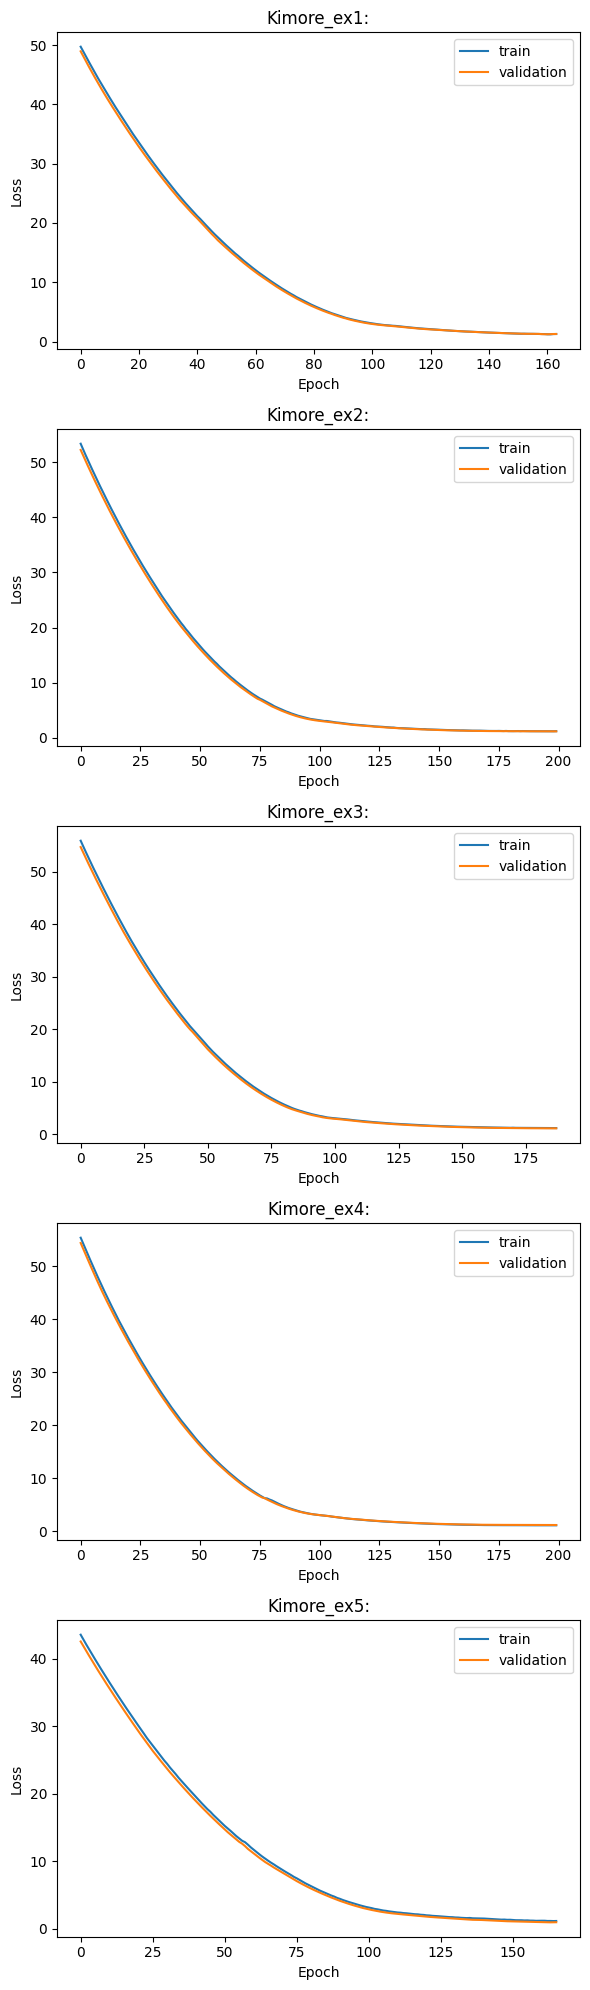

In [460]:
fig, axs = plt.subplots(len(x_train_list), figsize=(6, 20))
global train_Y_scaled,train_X_scaled
for i, (train_X_scaled, train_Y_scaled) in enumerate(zip(x_train_list,y_train_list), start=1):
    print(f"Exercise {i}:")


    # Remove every fourth column to remove the confidence column since it's a constant
    #Retain removes every 4th column which is for confidence.
    #Due to confidence being a constant, it doesn't affect the outcome/results if removed.
    retain = [i for i in range(train_X_scaled.shape[2]) if (i + 1) % 4 != 0]
    train_X_scaled=train_X_scaled[:,:,retain]

    # Split the data
    X_train, X_test, X_val, y_train, y_test, y_val = split_data(train_X_scaled, train_Y_scaled)
    # Print the shapes of the split data
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("X_val shape:", X_val.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    print("y_val shape:", y_val.shape)
    print()

    # design network
    # Define the input shape
    input_shape = (X_train.shape[1], X_train.shape[2])  # Assuming X_train is your training data

# Define the input layer
    input_layer = Input(shape=input_shape)


    # Define the LSTM layer with dropout
    lstm_layer = LSTM(units=X_train.shape[0], kernel_regularizer=regularizers.l2, activation='tanh')(input_layer)
    lstm_dropout = Dropout(0.2)(lstm_layer)  # Adding dropout with a rate of 0.2
    
    dense_layer1 = Dense(units=256, activation='relu', kernel_regularizer=regularizers.l1)(lstm_dropout)
    dense_dropout1 = Dropout(0.2)(dense_layer1)  # Adding dropout with a rate of 0.2
    
    dense_layer2 = Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2)(dense_dropout1)
    dense_dropout2 = Dropout(0.2)(dense_layer2)  # Adding dropout with a rate of 0.2
    
    dense_layer3 = Dense(units=64, activation='relu', kernel_regularizer=regularizers.l1)(dense_dropout2)
    dense_dropout3 = Dropout(0.2)(dense_layer3)  # Adding dropout with a rate of 0.2
    
    dense_layer4 = Dense(units=32, activation='relu', kernel_regularizer=regularizers.orthogonal_regularizer)(dense_dropout3)
    dense_dropout4 = Dropout(0.2)(dense_layer4)

    dense_layer5 = Dense(units=16, activation='relu', kernel_regularizer=regularizers.orthogonal_regularizer)(dense_dropout4)
    dense_dropout5 = Dropout(0.2)(dense_layer5)

    output=(Dense(units=1, activation='sigmoid'))(dense_dropout5)

    # Create the model
    model = Model(inputs=input_layer, outputs=output)
    
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Define a callback to save the best model weights
    checkpoint_callback = ModelCheckpoint('models/best_model_weights.keras',
                                      monitor='val_loss',
                                      verbose=1,
                                      save_best_only=True,
                                      mode='min')


# fit network

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=200 , batch_size=X_train.shape[0], validation_data=(X_val, y_val),callbacks=[early_stopping,checkpoint_callback], verbose=2, shuffle=True)
    

    # Get the best model weights
    best_weights_path = 'models/best_model_weights.h5'
    best_epoch = np.argmin(history.history['val_loss']) + 1
    best_val_loss = min(history.history['val_loss'])
    best_loss = history.history['loss'][best_epoch - 1]

    # Plot the training and validation loss for the current model
    axs[i-1].plot(history.history['loss'], label='train')
    axs[i-1].plot(history.history['val_loss'], label='validation')
    axs[i-1].set_title(f"Kimore_ex{i}:")
    axs[i-1].set_xlabel('Epoch')
    axs[i-1].set_ylabel('Loss')
    axs[i-1].legend()

plt.tight_layout()
plt.savefig('images/Exercises_loss.png')
plt.show()
    
    

# ••Evaluating Model Performance••

You should change your fit like so: knn.fit(X_train, y_train) Then to get the RMSE of it you should use the predict on your train data and compare it afterwards: y_train_pred = knn.predict(X_train) rmse = metrics.mean_squared_error(y_train, y_train_pred, squared=False) Everything else should stay the same

Performing Exploratory Data Analysis on X data...
Standard deviation of X_train:
0.9646198970660996
Standard deviation of X_test:
1.0610232425432444
Standard deviation of X_val:
1.0275833717814002
RMSE for training data: 1.0407851302582531
RMSE for testing data: 0.9537167488310586
RMSE for validation data: 0.9190313125381291


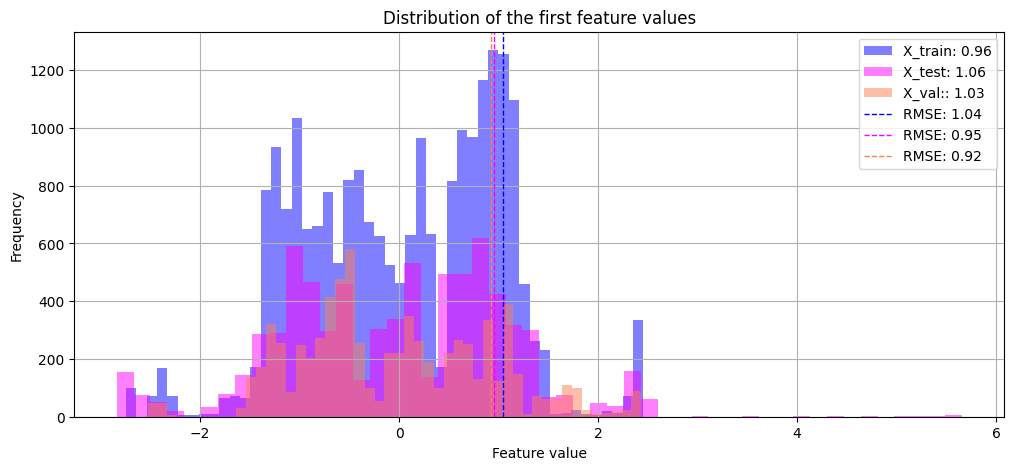

<Figure size 640x480 with 0 Axes>

In [461]:

def perform_eda():
        global X_train, X_test, X_val,y_test,model
        print("Performing Exploratory Data Analysis on X data...")
        # Calculate standard deviation for X_train, X_test, and X_val
        std_train = np.std(X_train, axis=(0, 1))
        std_test = np.std(X_test, axis=(0, 1))
        std_val = np.std(X_val, axis=(0, 1))
        
        std_train =np.mean(std_train)
        std_test =np.mean(std_test)
        std_val =np.mean(std_val)
    
    # Print standard deviations
        print(f"Standard deviation of X_train:\n{std_train}")
        print(f"Standard deviation of X_test:\n{std_test}")
        print(f"Standard deviation of X_val:\n{std_val}")
        
        # RMSE for train,test,val data
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
        test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
        val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
        
        print("RMSE for training data:", train_rmse)
        print("RMSE for testing data:", test_rmse)
        print("RMSE for validation data:", val_rmse)
    
        # Calculate RMSE
        #rmse = mean_squared_error(y_test, y_pred, squared=False)
        #print(f"RMSE: {rmse}")
        
    
        # Visualization: histogram of the first feature across all samples and time steps
        plt.figure(figsize=(12, 5))
        plt.hist(X_train[:, :, 0].flatten(), bins=50, alpha=0.5, color='blue', label=f'X_train: {std_train:.2f}')
        plt.hist(X_test[:, :, 0].flatten(), bins=50, alpha=0.5, color='magenta', label=f'X_test: {std_test:.2f}')
        plt.hist(X_val[:, :, 0].flatten(), bins=50, alpha=0.5, color='Coral', label=f'X_val:: {std_val:.2f}')
        plt.axvline(x=train_rmse, color='blue', linestyle='dashed', linewidth=1, label=f'RMSE: {train_rmse:.2f}')
        plt.axvline(x=test_rmse, color='magenta', linestyle='dashed', linewidth=1, label=f'RMSE: {test_rmse:.2f}')
        plt.axvline(x=val_rmse, color='Coral', linestyle='dashed', linewidth=1, label=f'RMSE: {val_rmse:.2f}')
        plt.title('Distribution of the first feature values')
        plt.xlabel('Feature value')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True)
        plt.show()
        plt.savefig('images/Exploratory_data_distribution.png')
        
    # Perform EDA
perform_eda()


# ••Importing Participants Data••

In [462]:
import os
import glob
from collections import defaultdict

def import_joint_data(data_folder):
    """
    Imports JointOrientation and JointPosition data from all E_ID and Es folders
    within the given data folder, sorted by E_ID and Es.

    Args:
        data_folder (str): Path to the top-level data folder.

    Returns:
        dict: A dictionary containing Es files as keys and a list of corresponding Joint files as values.
    """

    joint_files = defaultdict(dict)

    for expert_folder in sorted(os.listdir(data_folder)):
        # Makes the code iterate through the participants folders: *_ID
        # * represents the category a participant is in: 
        if expert_folder.startswith(("E_ID", "NE_ID", "B_ID", "P_ID", "S_ID")):
            expert_path = os.path.join(data_folder, expert_folder)
            for es_folder in sorted(os.listdir(expert_path)):
                if es_folder.startswith("Es"):  # Check if it's an Es folder
                    es_path = os.path.join(expert_path, es_folder, "Raw")
                    joint_orientation_files = glob.glob(os.path.join(es_path, "*JointOrientation*.csv"))
                    joint_position_files = glob.glob(os.path.join(es_path, "*JointPosition*.csv"))
                    joint_files[expert_folder][es_folder] = joint_orientation_files + joint_position_files

    return joint_files

# Example usage
data_folders = ["data/CG/Expert", "data/CG/NotExpert","data/GPP/BackPain","data/GPP/Parkinson","data/GPP/Stroke"]  # Assuming your data folder paths
joint_files = {}
for data_folder in data_folders:
    joint_files.update(import_joint_data(data_folder))

# Iterate through E_ID, NE_ID, B_ID, P_ID, S_ID folders and Es folders
for expert_folder, es_files in sorted(joint_files.items()):
    if expert_folder.startswith(("E_ID", "NE_ID", "B_ID", "P_ID", "S_ID")):
        print()
        print(f"{expert_folder} folder: {expert_folder}")
        for es_file, joint_list in sorted(es_files.items()):
            print(f"  Es file: {es_file}")
            for joint_file in sorted(joint_list):
                print(f"    - {os.path.basename(joint_file)}")

# Now you can use these lists for further processing
# (e.g., read the files using pandas or another library)



B_ID1 folder: B_ID1
  Es file: Es1
    - JointOrientation110616_123040.csv
    - JointPosition110616_123040.csv
  Es file: Es2
    - JointOrientation110616_123131.csv
    - JointPosition110616_123131.csv
  Es file: Es3
    - JointOrientation110616_123221.csv
    - JointPosition110616_123221.csv
  Es file: Es4
    - JointOrientation110616_123334.csv
    - JointPosition110616_123334.csv
  Es file: Es5
    - JointOrientation110616_123500.csv
    - JointPosition110616_123500.csv

B_ID2 folder: B_ID2
  Es file: Es1
    - JointOrientation110616_122047.csv
    - JointPosition110616_122047.csv
  Es file: Es2
    - JointOrientation110616_122223.csv
    - JointPosition110616_122223.csv
  Es file: Es3
    - JointOrientation110616_122338.csv
    - JointPosition110616_122338.csv
  Es file: Es4
    - JointOrientation110616_122450.csv
    - JointPosition110616_122450.csv
  Es file: Es5
    - JointOrientation110616_122626.csv
    - JointPosition110616_122626.csv

B_ID3 folder: B_ID3
  Es file: Es1
  

# ••Joint Data••

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


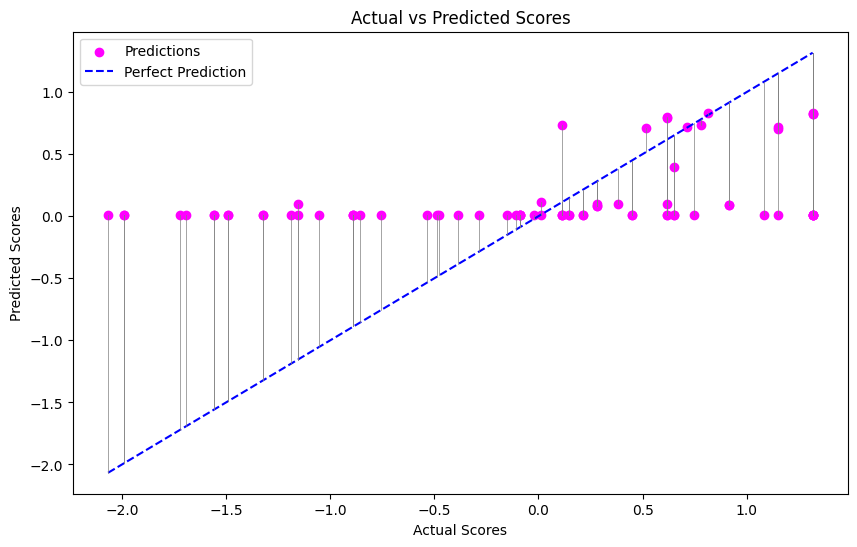

In [463]:
global model, X_train, y_train, X_val, y_val, X_test, y_test

def evaluate_model(model, X_test):
    predictions = model.predict(X_test).flatten()
    return predictions
def plot_ranking(predictions, y_test):
    """
    Plots the ranking of actual vs predicted scores.

    Args:
        predictions: The model's predictions.
        y_test: The ground truth labels.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, color='magenta', label='Predictions')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Perfect Prediction')

    for i in range(len(y_test)):
        plt.plot([y_test[i], y_test[i]], [y_test[i], predictions[i]], color='gray', linestyle='-', linewidth=0.5)

    plt.title("Actual vs Predicted Scores")
    plt.legend(loc='best')
    plt.xlabel('Actual Scores')
    plt.ylabel('Predicted Scores')
    plt.show()

# Evaluate the model and plot the ranking
predictions = evaluate_model(model, X_test)
plot_ranking(predictions, y_test)
